# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.

$SSE = \sum_{i=1}^N (y_i-\hat{y_i})^2 = \sum_{i=1}^N (y_i-b_0 - b_1 z_{i1} - b_2 z_{i2})^2 $

---
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.

$\frac{∂SSE}{∂b_0}=-2\sum_{i=1}^N (y_i-b_0 - b_1 z_{i1} - b_2 z_{i2}) = -2\sum_{i=1}^N (y_i-\hat{y_i})=-2\sum_{i=1}^Ne_i$

$\frac{∂SSE}{∂b_1}=-2\sum_{i=1}^N z_{i1}(y_i-b_0 - b_1 z_{i1} - b_2 z_{i2})=-2\sum_{i=1}^Nz_{i1}e_i$

$\frac{∂SSE}{∂b_2}=-2\sum_{i=1}^N z_{i2}(y_i-b_0 - b_1 z_{i1} - b_2 z_{i2})=-2\sum_{i=1}^Nz_{i2}e_i$

---
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.

$\bar{e} = \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y_i})$

$\bar{e}= \frac{1}{N}\sum_{i=1}^N (y_i-b_0 - b_1 z_{i1} - b_2 z_{i2})$

$\bar{e}=\frac{1}{N}\sum_{i=1}^N y_i-\frac{1}{N}\sum_{i=1}^N b_0 - \frac{1}{N}\sum_{i=1}^N b_1 z_{i1} -  \frac{1}{N}\sum_{i=1}^N b_2 z_{i2}$

$\bar{e}= \bar{y}- b_0$ as $\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0$

When the model is at the optimum, $b_0=\bar{y}$, so $\bar{e}=0$.
Then, $e\cdot z=\sum_{i=1}^N e_iz_i=N\bar{e}\sum_{i=1}^N z_i=0$

---
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.

From part 3, we know that $\bar{e}=\bar{y}- b_0=0$ at the optimal, then

$\bar{e}= \bar{y}-b_0 = 0$
so $b_0^*=\bar{y}$

So the remaining equation after eliminate $b_o^*$ is:

$\hat{y}_i-\bar{y} = b_1 z_{i1} + b_2 z_{i2} = b_1 z_{i1} + b_2 z_{i2}$

---
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.

From part 3 we know that $e\cdot z=0$, then $\sum_{i=1}^N z_{1i} y_i= b_1 \sum_{i=1}^N z_{1i}^2 + b_2 \sum_{i=1}^N z_{1i} z_{2i}$, $\sum_{i=1}^N z_{2i} y_i = b_1 \sum_{i=1}^N z_{1i} z_{2i}+ b_2 \sum_{i=1}^N z_{2i}^2$
Then we could have the matrix equation $Ab=C$, where

$A = \begin{pmatrix}
\sum_{i=1}^N z_{1i}^2 & \sum_{i=1}^N z_{1i} z_{2i} \\
\sum_{i=1}^N z_{1i} z_{2i} & \sum_{i=1}^N z_{2i}^2
\end{pmatrix}$

$b = \begin{pmatrix}
b_1\\
b_2
\end{pmatrix}$

$C = \begin{pmatrix}
\sum_{i=1}^N z_{1i} y_i\\
\sum_{i=1}^N z_{2i} y_i
\end{pmatrix}$

---
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

Divide both sides by $N$ and  substitute $z_{ij} = x_{ij} - m_j$

$\frac{A}{N} = \begin{pmatrix}
\frac{\sum_{i=1}^N z_{1i}^2}{N} & \frac{\sum_{i=1}^N z_{1i} z_{2i}}{N} \\
\frac{\sum_{i=1}^N z_{1i} z_{2i}}{N} & \frac{\sum_{i=1}^N z_{2i}^2}{N}
\end{pmatrix} = \begin{pmatrix}
\frac{\sum_{i=1}^N (x_{1i}-m_1)^2}{N} & \frac{\sum_{i=1}^N (x_{1i}-m_1) (x_{2i}-m_2)}{N} \\
\frac{\sum_{i=1}^N (x_{1i}-m_1)(x_{2i}-m_2)}{N} & \frac{\sum_{i=1}^N (x_{2i}-m_2)^2}{N}
\end{pmatrix} =\frac{1}{N}S_{xx}$

$b = \begin{pmatrix}
b_1\\
b_2
\end{pmatrix}$

$\frac{C}{N} = \begin{pmatrix}
\frac{\sum_{i=1}^N z_{1i} y_i}{N}\\
\frac{\sum_{i=1}^N z_{2i} y_i}{N}
\end{pmatrix}= \begin{pmatrix}
\frac{\sum_{i=1}^N (x_{1i}-m_1) y_i}{N}\\
\frac{\sum_{i=1}^N (x_{2i}-m_1) y_i}{N}
\end{pmatrix}=\frac{1}{N}S_{xy}$

So $Ab=C$ is $S_{xx}b=S_{xy}$, then $b=\frac{S_{xy}}{S_{xx}}$ shows that we can use $S_{xx}$ and $S_{xy}$ to find the optimal coefficients by solving for the gradient vector of the best-fit line of the linear regression.  

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

  3. Split the data into an 80% training set and a 20% testing set.

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/xec9cp/linear_models_assignment/refs/heads/main/data/heart_hw.csv", index_col=0)
df.head()

,age,transplant,y
1,53,control,0
2,43,control,0
3,52,control,0
4,52,control,0
5,54,control,0


In [3]:
df.isna().sum()

,0
age,0
transplant,0
y,0


1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.

In [4]:
# (a)
control = (df['transplant']=="control")
prop_con_sur = control.loc[df.y==1].sum()/control.sum()
print("The proportion of people who survive in the control group who do not receive a transplant is", prop_con_sur)

The proportion of people who survive in the control group who do not receive a transplant is 0.11764705882352941


In [5]:
# (b)
treatment = (df['transplant']=="treatment")
prop_treat_sur = treatment.loc[df.y==1].sum()/treatment.sum()
print("The proportion of people who survive in the treatment group is", prop_treat_sur)
diff_prop = prop_treat_sur-prop_con_sur
print("The average treatment effect is", diff_prop)

The proportion of people who survive in the treatment group is 0.34782608695652173
The average treatment effect is 0.23017902813299232


2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

In [6]:
## Simple regression on brand dummies:

# Target Variable
y = df['y']

# Transplant Dummy:
print(df['transplant'].unique())
X_d = pd.get_dummies(df['transplant'],dtype='int') # Create brand dummies

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, y)) # R squared measure
results

['control' 'treatment']
R-squared:  0.059188892948483174


,variable,coefficient
0,control,0.117647
1,treatment,0.347826


With the linear regression model $y=\beta_0+\beta_1I_1$ where $I_1 = 0$ if transplant is control and $I_1 = 1$ if transplant is treatment, $\hat{\beta_0} = \hat{y}-\hat{\beta_1}I_1$, and $\hat{\beta_1} = \frac{\hat{y}-\hat{\beta_0}}{I_1}$. Then, when $I_1 = 0 $(control group), $\hat{\beta_0} = \hat{y}$; when $I_1 = 1 $(treatment group), $\hat{\beta_1} = \hat{y}-\hat{\beta_0}$

- The constant/intercept is 0.117647 which is approximately the proportion of people who survive in the control group who do not receive a transplant we found in 1a.
- The coefficient $\hat{\beta_1}= \hat{y}-\hat{\beta_0}=0.347826-0.117647=0.230179$, which is approximately the average treatment effect we found in 1b.
---

3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?


In [7]:
from sklearn.preprocessing import PolynomialFeatures
## More complex regression on brand and numeric values:

# Target Variable
y = df['y']

# Expand numeric variables:
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
X_num = df.loc[:,['age']]
Z = expander.fit_transform(X_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_num = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
X_num.index = np.arange(1, len(X_num) + 1) #make both X_num and X_d to have the same index
# Concatenate
X = pd.concat( [X_num, X_d],axis=1)

In [8]:
reg2 = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
results2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_}) # Regression coefficients
results2

,variable,coefficient
0,age,-0.013607
1,control,0.701957
2,treatment,0.966659


With the linear regression model $y=\beta_0+\beta_1I_1+\beta_2age$ where $I_1 = 0$ if transplant is control and $I_1 = 1$ if transplant is treatment, $\hat{\beta_0} = \hat{y}-\hat{\beta_1}I_1-\hat{\beta_2}age$.

- Then in this case, the intercept decreases by the amount of age and its estimated coefficients.
---

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.


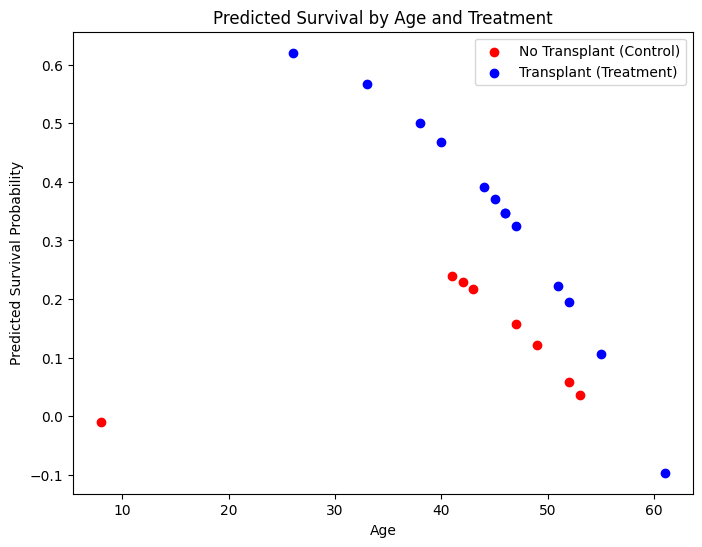

In [9]:
from sklearn.model_selection import train_test_split
# Split data
X = X[['age','treatment']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build model with interactions
expander = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

X_train['age2'] = X_train['age']**2
X_train['age_trans'] = X_train['age'] * X_train['treatment']
X_train['age2_trans'] = X_train['age2'] * X_train['treatment']

X_test['age2'] = X_test['age']**2
X_test['age_trans'] = X_test['age'] * X_test['treatment']
X_test['age2_trans'] = X_test['age2'] * X_test['treatment']

# Fit on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Scenarios
control = X_test[X_test['treatment']==0]
treat   = X_test[X_test['treatment']==1]

# Predict survival probabilities
control_pred = model.predict(control)
treat_pred   = model.predict(treat)

plt.figure(figsize=(8,6))
plt.scatter(control.age, control_pred, label="No Transplant (Control)", color="red")
plt.scatter(treat.age, treat_pred, label="Transplant (Treatment)", color="blue")
plt.xlabel("Age")
plt.ylabel("Predicted Survival Probability")
plt.title("Predicted Survival by Age and Treatment")
plt.legend()
plt.show()



- No transplant (control group) tend to have a lower predicted survival probability compare to the treatment group, while holding age to be constant.
- Age seems to show a negative linear relationship with the prodicted survival probability, if we hold transplant treatment constant. It also seems to show a minor quadratic shape in the graph.
- The control group seems to have a possible outlier with age below 10.
---

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [10]:
df.describe()

,age,y
count,103.000000,103.000000
mean,44.640777,0.271845
std,9.797813,0.447086
min,8.000000,0.000000
25%,41.000000,0.000000
50%,47.000000,0.000000
75%,52.000000,1.000000
max,64.000000,1.000000


- The sample population we have to build the model is not universal enough to apply to the level for the whole country to use, and it is comparably small.
- Our sample population for the model building has a uneven distribution for age variable, which is mainly between 41 to 52 years old population.
